
## BUSINESS OVERVIEW
---

### Introduction

In today's highly competitive business landscape, customer retention is crucial for the success of any company. The ability to identify and predict customer churn, where customers discontinue their relationship with a company, is of great importance to businesses. By understanding the factors that contribute to customer churn, companies can take proactive steps to retain customers, improve customer satisfaction, and optimize their business strategies.

### Business understanding
In this project, we are working with SyriaTel, a telecommunications company, to predict customer churn. The goal is to build a classifier that can identify customers who are likely to stop using SyriaTel's services. By understanding the factors contributing to churn, SyriaTel can take proactive measures to retain customers and improve their business performance. Through data analysis and predictive modeling, we aim to provide insights and recommendations that can help SyriaTel reduce churn rates and enhance customer retention strategies.

** Objectives **
1. Build a predictive model to accurately classify customers as churn or non-churn.
2. Identify key factors and patterns that contribute to customer churn in SyriaTel.
3. Provide actionable recommendations for SyriaTel to implement targeted retention strategies and reduce churn rates.

---
## Data Understanding


The dataset consists of various features such as customer information, usage patterns, and service details. The target variable is "churn," indicating whether a customer has churned or not. We will preprocess the data, perform exploratory data analysis, and generate relevant features to prepare it for modeling.

In [30]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Loading the dataset from a CSV file
df = pd.read_csv('syriatel.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [32]:
# the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [34]:
#an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [35]:
#statistical summary of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [36]:
# Checking for missing values in each column
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [37]:
df.duplicated().sum()

0

checking for outliers

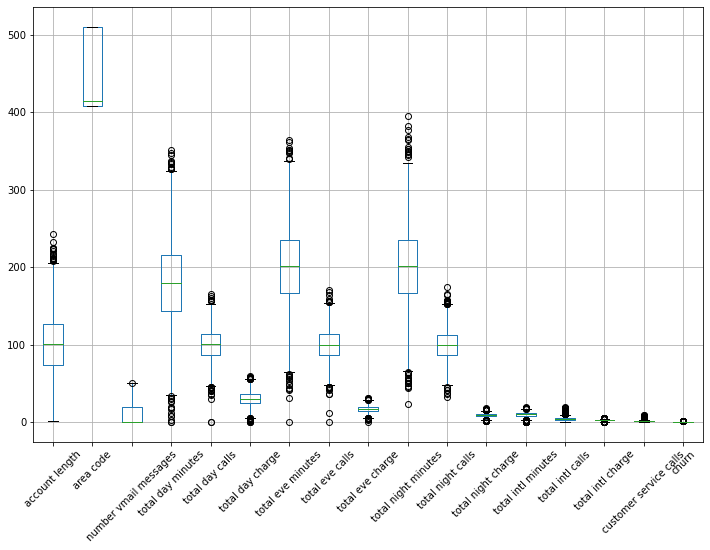

In [38]:
#Box plot of numerical features to identify outliers
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

#### Analyzing the target variable

In [39]:

# Count the number of instances in each class of the target variable
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [40]:
# Calculate the percentage of churned customers
churn_percentage = df['churn'].value_counts(normalize=True) * 100
churn_percentage

False    85.508551
True     14.491449
Name: churn, dtype: float64

In [41]:
#Display unique values of categorical variables
for column in df.select_dtypes(include='object'):
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print()

Unique values in state:
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Unique values in phone number:
['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']

Unique values in international plan:
['no' 'yes']

Unique values in voice mail plan:
['yes' 'no']




#### Exploratory data analysis

distribution of the target variable (churn)

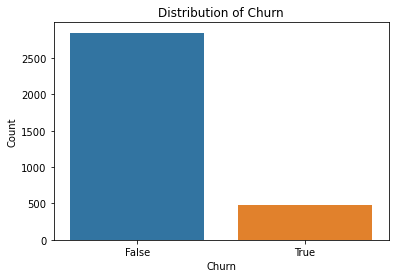

In [42]:
# Visualize the distribution of the target variable (churn)

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show();

This distribution gives us an insight into the proportion of churned and non-churned customers in the dataset. It suggests that there is a class imbalance, with a larger number of non-churned customers compared to churned customers.

distribution of the numerical features

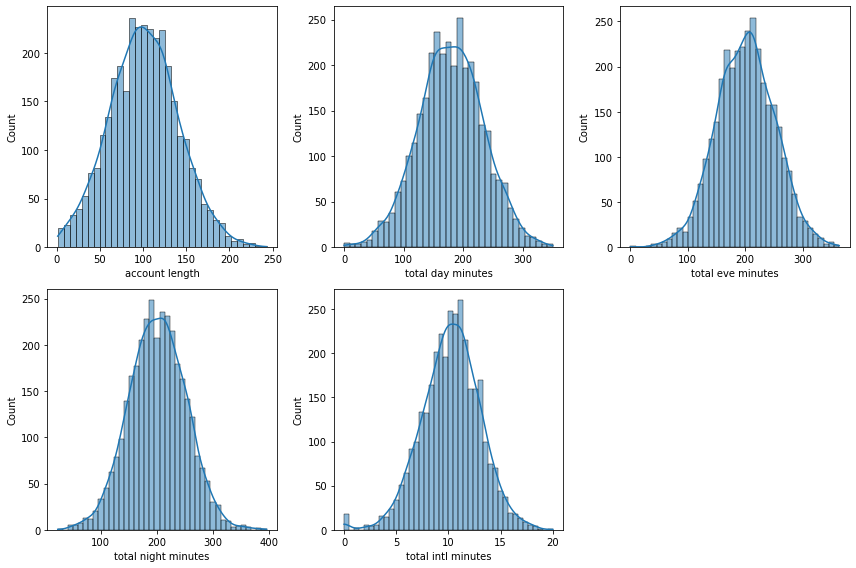

In [43]:
# Explore the distribution of numerical features
numerical_cols = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
plt.tight_layout()
plt.show();

these numerical features are normally skewed

distribution of the categorical features 

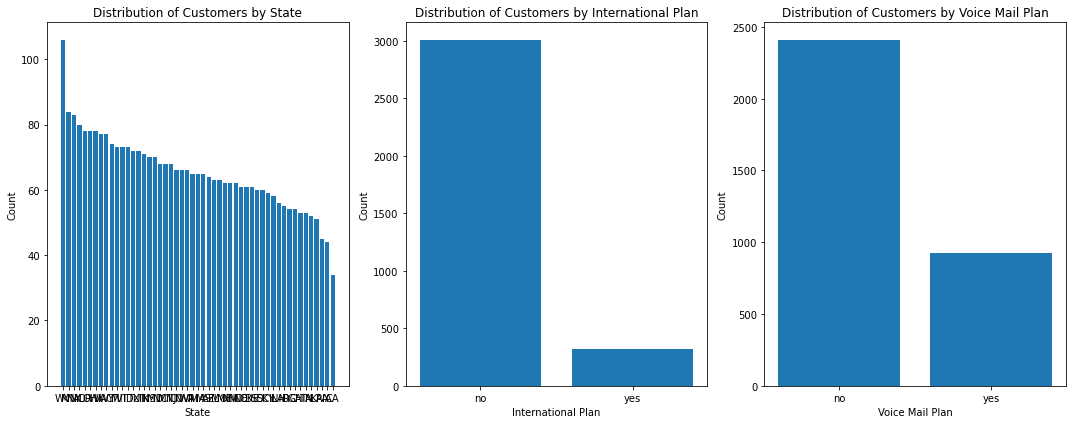

In [44]:

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot for 'state'
axes[0].bar(df['state'].value_counts().index, df['state'].value_counts().values)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Customers by State')

# Plot for 'international plan'
axes[1].bar(df['international plan'].value_counts().index, df['international plan'].value_counts().values)
axes[1].set_xlabel('International Plan')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Customers by International Plan')

# Plot for 'voice mail plan'
axes[2].bar(df['voice mail plan'].value_counts().index, df['voice mail plan'].value_counts().values)
axes[2].set_xlabel('Voice Mail Plan')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Customers by Voice Mail Plan')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


relationship between churn and categorical features

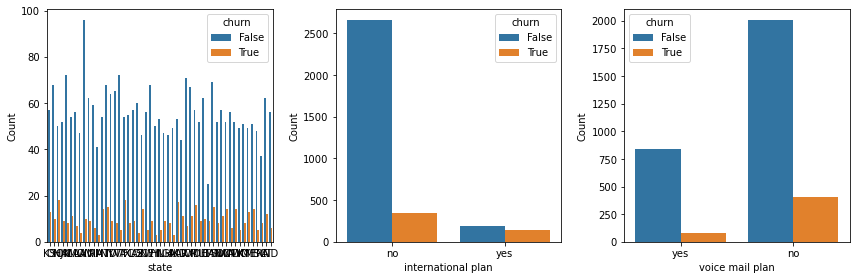

In [45]:
# Analyze the relationship between churn and categorical features
categorical_cols = ['state', 'international plan', 'voice mail plan']
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='churn', data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show();

customers with an international plan have a higher churn rate compared to customers without an international plan.

customers without a voice mail plan have a slightly higher churn rate compared to customers with a voice mail plan. The presence of a voice mail plan seems to be associated with a slightly lower likelihood of churn. 

correlation heatmap with churn 

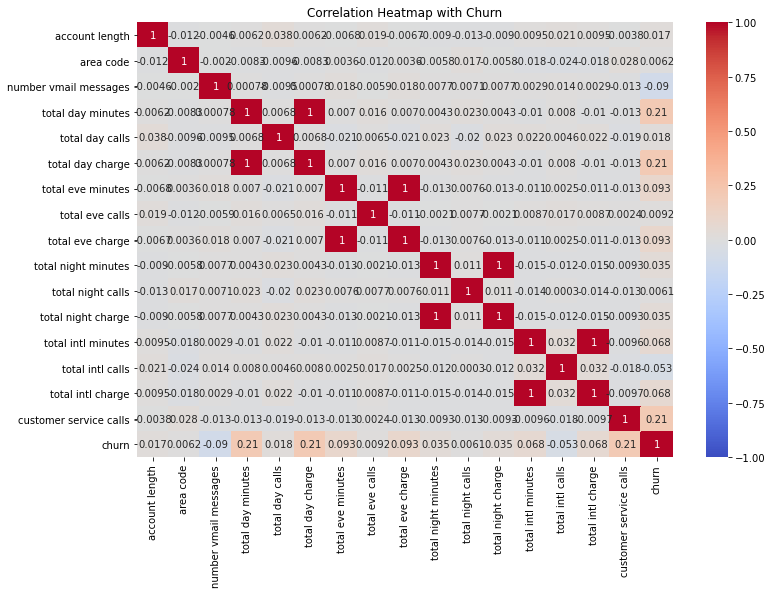

In [46]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Select the correlation of 'churn' with other features
churn_correlation = correlation_matrix['churn']

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Churn')
plt.show()

'number vmail messages' has a weak negative correlation (-0.089728) with 'churn', indicating that customers with a higher number of voicemail messages are slightly less likely to churn.

'total day minutes', 'total day charge', 'total eve minutes', and 'total eve charge' have a positive correlation with 'churn', suggesting that as these values increase, the likelihood of churn also tends to increase. Among them, 'total day minutes' (0.205151) has the strongest positive correlation with 'churn'.

'customer service calls' has a positive correlation (0.208750) with 'churn', indicating that as the number of customer service calls increases, the likelihood of churn also tends to increase.

correlations between numerical features

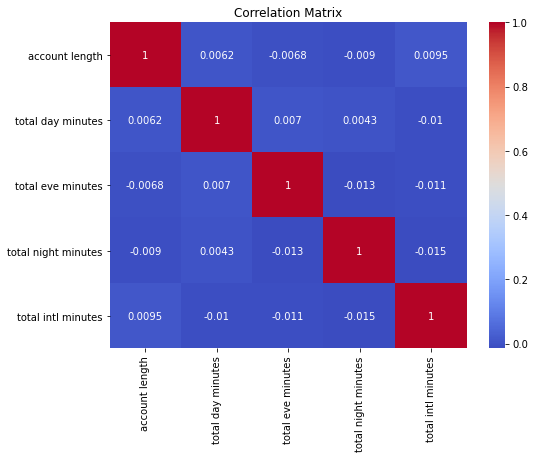

In [47]:
# Compute and visualize correlations between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();


---
### Data preparation

dropping irrelevant columns

In [48]:
df = df.drop('phone number', axis=1)

##### Encoding categorical variables

In [49]:
# One-hot encoding for logistic regression
df_1 = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)

In [50]:
# Label encoding for random forest
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_2= df.copy()
df_2['state'] = label_encoder.fit_transform(df['state'])
df_2['international plan'] = label_encoder.fit_transform(df['international plan'])
df_2['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

feature scaling for logistic regression

In [51]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Scale the numeric features
scaler = StandardScaler()
df_1[numeric_features] = scaler.fit_transform(df_1[numeric_features])

performing train_test_split and Handling imbalance classes for both models 

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the encoded dataset for random forest (df_2)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_2.drop('churn', axis=1), df_2['churn'], test_size=0.2, random_state=42)

# Split the encoded dataset for logistic regression (df_1)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df_1.drop('churn', axis=1), df_1['churn'], test_size=0.2, random_state=42)

# Handling imbalance classes for random forest
smote_rf = SMOTE()
X_resampled_rf, y_resampled_rf = smote_rf.fit_resample(X_train_rf, y_train_rf)

# Handling imbalance classes for logistic regression
smote_lr = SMOTE()
X_resampled_lr, y_resampled_lr = smote_lr.fit_resample(X_train_lr, y_train_lr)

---
### Modelling


#### Feature selection

 Identifying the most relevant features that have the most significant impact on churn prediction. This involves analyzing feature importance and selecting the most informative variables for the predictive model.

Using Logistic regression

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_resampled_lr, y_resampled_lr)

# Perform feature selection using the logistic regression model
feature_selection = SelectFromModel(logreg)
selected_features_lr = feature_selection.fit_transform(X_resampled_lr, y_resampled_lr)

# Get the selected feature indices
selected_feature_indices_lr = feature_selection.get_support(indices=True)

# Get the selected feature names
selected_features_names_lr = X_resampled_lr.columns[selected_feature_indices_lr]

Using random forest

In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_resampled_rf, y_resampled_rf)

# Perform feature selection using the random forest classifier
feature_selection = SelectFromModel(rf)
selected_features_rf = feature_selection.fit_transform(X_resampled_rf, y_resampled_rf)

# Get the selected feature indices
selected_feature_indices_rf = feature_selection.get_support(indices=True)

# Get the selected feature names
selected_features_names_rf = X_resampled_rf.columns[selected_feature_indices_rf]

In [55]:
selected_features_names_rf

Index(['number vmail messages', 'total day minutes', 'total day charge',
       'total eve minutes', 'total eve charge', 'customer service calls'],
      dtype='object')

These features were deemed most informative for predicting customer churn using random forest.

train and evaluate the logistic regression model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the selected features
X_train_selected_lr = X_resampled_lr.iloc[:, selected_feature_indices_lr]
logreg.fit(X_train_selected_lr, y_resampled_lr)

# Make predictions on the test data
X_test_selected_lr = X_test_lr.iloc[:, selected_feature_indices_lr]
y_pred_lr = logreg.predict(X_test_selected_lr)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_lr, y_pred_lr)
precision = precision_score(y_test_lr, y_pred_lr)
recall = recall_score(y_test_lr, y_pred_lr)
f1 = f1_score(y_test_lr, y_pred_lr)

# Print the evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression Model Evaluation:
Accuracy: 0.8215892053973014
Precision: 0.09090909090909091
Recall: 0.019801980198019802
F1-score: 0.032520325203252036


The logistic regression model achieved an accuracy of 82.15%, indicating that it correctly predicted the churn status for approximately 82.15% of the customers. The precision of 9.09% suggests that out of the predicted churn cases, only 9.09% were true positives. The recall of 1.98% indicates that the model identified only 1.98% of the actual churn cases correctly. The F1-score of 3.25% is a measure of the model's balance between precision and recall. Overall, the model's performance in predicting churn is moderate.

training and evaluating random forest model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model on the selected features
X_train_selected_rf = X_resampled_rf.iloc[:, selected_feature_indices_rf]
rf.fit(X_train_selected_rf, y_resampled_rf)

# Make predictions on the test data
X_test_selected_rf = X_test_rf.iloc[:, selected_feature_indices_rf]
y_pred_rf = rf.predict(X_test_selected_rf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_rf, y_pred_rf)
precision = precision_score(y_test_rf, y_pred_rf)
recall = recall_score(y_test_rf, y_pred_rf)
f1 = f1_score(y_test_rf, y_pred_rf)


# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Random Forest Model Evaluation:
Accuracy: 0.856071964017991
Precision: 0.5179856115107914
Recall: 0.7128712871287128
F1-score: 0.5999999999999999


The random forest model achieved a higher accuracy of 85.60% compared to the logistic regression model. This indicates that the random forest model correctly predicted the churn status for approximately 85.60% of the customers. The precision of 51.79% suggests that out of the predicted churn cases, 51.79% were true positives. The recall of 71.29% indicates that the model identified 71.29% of the actual churn cases correctly. The F1-score of 59.99% is a measure of the model's balance between precision and recall. Overall, the random forest model outperforms the logistic regression model in terms of accuracy, precision, recall, and F1-score, indicating better predictive performance for churn prediction.

hyperparameter tuning for random forest model

In [58]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['auto', 'sqrt']  # Maximum number of features to consider for the best split
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

In [59]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected_rf, y_resampled_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [60]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


In [61]:
# Create a new Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_rf.fit(X_train_selected_rf, y_resampled_rf)

# Make predictions on the test data
y_pred_rf_tuned = best_rf.predict(X_test_selected_rf)

# Calculate evaluation metrics
accuracy_tuned = accuracy_score(y_test_rf, y_pred_rf_tuned)
precision_tuned = precision_score(y_test_rf, y_pred_rf_tuned)
recall_tuned = recall_score(y_test_rf, y_pred_rf_tuned)
f1_tuned = f1_score(y_test_rf, y_pred_rf_tuned)

# Print the evaluation metrics
print("Tuned Model Evaluation:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)

Tuned Model Evaluation:
Accuracy: 0.8605697151424287
Precision: 0.5289855072463768
Recall: 0.7227722772277227
F1-score: 0.6108786610878661


The tuned random forest model shows slight improvements in precision and F1-score compared to the default model. It has a higher ability to correctly classify churned customers (higher precision), but it may miss some actual churned customers (lower recall). Overall, the tuned model has a better balance between precision and recall, resulting in a higher F1-score.

### Conclusion

1. The logistic regression and random forest models identified customer service calls as an important factor in predicting churn.

2. Both models highlighted the significance of international plans in predicting churn.

3. The analysis revealed that specific usage patterns, such as the total day minutes and total eve minutes, were important predictors of churn. 

4. The churn prediction models can be used to identify high-risk customers who are more likely to churn.


### Recommendations

1. Focus on improving customer service.

2. Personalized offers for international plans.

3. Analyze usage patterns and identify opportunities.

4. Proactively monitor and engage high-risk customers.

### Next steps 

1. Implement the recommended retention strategies, including personalized incentives, improved customer service, and proactive outreach to high-risk customers.

2. Track and measure the impact of the implemented strategies by monitoring churn rates, customer satisfaction levels, and key performance indicators related to customer retention.

3. Conduct further analysis to gain deeper insights into customer behavior, preferences, and churn drivers. This may involve conducting customer surveys or interviews.
